# EXPLORATORY DATA ANALYSIS OF SUBSET IN KAGGLE

# EXPLORATORY DATA ANALYSIS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import gc

In [2]:
#Adjust path of dataset accordingly :
#movie_titles data is available at the following website https://www.kaggle.com/netflix-inc/netflix-prize-data
#mv_ss is generated from the file data_preparation netflix

mv_info = pd.read_csv('../input/dataset/movie_titles.csv',error_bad_lines=False, header=None, names = ['MovieID','YearOfRelease','Title'])
mv_info['YearOfRelease'] = mv_info['YearOfRelease'].fillna(0).astype(int)
mv_ss = pd.read_csv('../input/datasetbalanced/movies_subset_balanced.csv')
mv_ss_full = mv_ss.merge(mv_info, left_on = 'MovieID', right_on = 'MovieID')
mv_ss_full['RatingDate'] = pd.to_datetime(mv_ss_full['RatingDate'])

In [3]:
mv_ss_full

,MovieID,UserID,Rating,RatingDate,YearOfRelease,Title
0,30,1366162,1,2005-10-26,2003,Something's Gotta Give
1,30,483101,1,2005-07-07,2003,Something's Gotta Give
2,30,2148796,1,2004-11-20,2003,Something's Gotta Give
3,30,998271,1,2004-06-21,2003,Something's Gotta Give
4,30,607621,1,2005-06-07,2003,Something's Gotta Give
...,...,...,...,...,...,...
249995,17627,2535210,5,2003-05-09,2001,Harry Potter and the Sorcerer's Stone
249996,17627,1649540,5,2005-11-20,2001,Harry Potter and the Sorcerer's Stone
249997,17627,1488234,5,2002-06-07,2001,Harry Potter and the Sorcerer's Stone
249998,17627,610780,5,2003-05-10,2001,Harry Potter and the Sorcerer's Stone


In [4]:
mv_ss_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   MovieID        250000 non-null  int64         
 1   UserID         250000 non-null  int64         
 2   Rating         250000 non-null  int64         
 3   RatingDate     250000 non-null  datetime64[ns]
 4   YearOfRelease  250000 non-null  int64         
 5   Title          250000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 13.4+ MB


In [5]:
mv_info

,MovieID,YearOfRelease,Title
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [6]:
mv

mv: missing file operand
Try 'mv --help' for more information.


In [7]:
mv_ss

,MovieID,UserID,Rating,RatingDate
0,30,1366162,1,2005-10-26
1,30,483101,1,2005-07-07
2,30,2148796,1,2004-11-20
3,30,998271,1,2004-06-21
4,30,607621,1,2005-06-07
...,...,...,...,...
249995,17627,2535210,5,2003-05-09
249996,17627,1649540,5,2005-11-20
249997,17627,1488234,5,2002-06-07
249998,17627,610780,5,2003-05-10


# Number of movies

In [8]:
n_tot_movies = mv_ss['MovieID'].nunique()
n_tot_movies 

200

# Number of users

In [9]:
n_tot_users = mv_ss['UserID'].nunique()
n_tot_users

164859

# Number of reviews per movie for sample of n movies

In [10]:
n_sample = 60
least_reviews_per_movie = mv_ss.groupby('MovieID').count().sort_values('UserID', ascending = False)['UserID'][-n_sample :]
least_reviews_per_movie = pd.merge(least_reviews_per_movie, mv_info, left_on = 'MovieID', right_on = 'MovieID')

In [11]:
least_reviews_per_movie

,MovieID,UserID,YearOfRelease,Title
0,1428,1250,2003,The Recruit
1,1470,1250,2002,Bend It Like Beckham
2,1542,1250,1993,Sleepless in Seattle
3,1798,1250,1987,Lethal Weapon
4,1865,1250,2004,Eternal Sunshine of the Spotless Mind
5,1905,1250,2003,Pirates of the Caribbean: The Curse of the Bla...
6,1962,1250,2004,50 First Dates
7,2122,1250,1999,Being John Malkovich
8,2152,1250,2000,What Women Want
9,4640,1250,1988,Rain Man


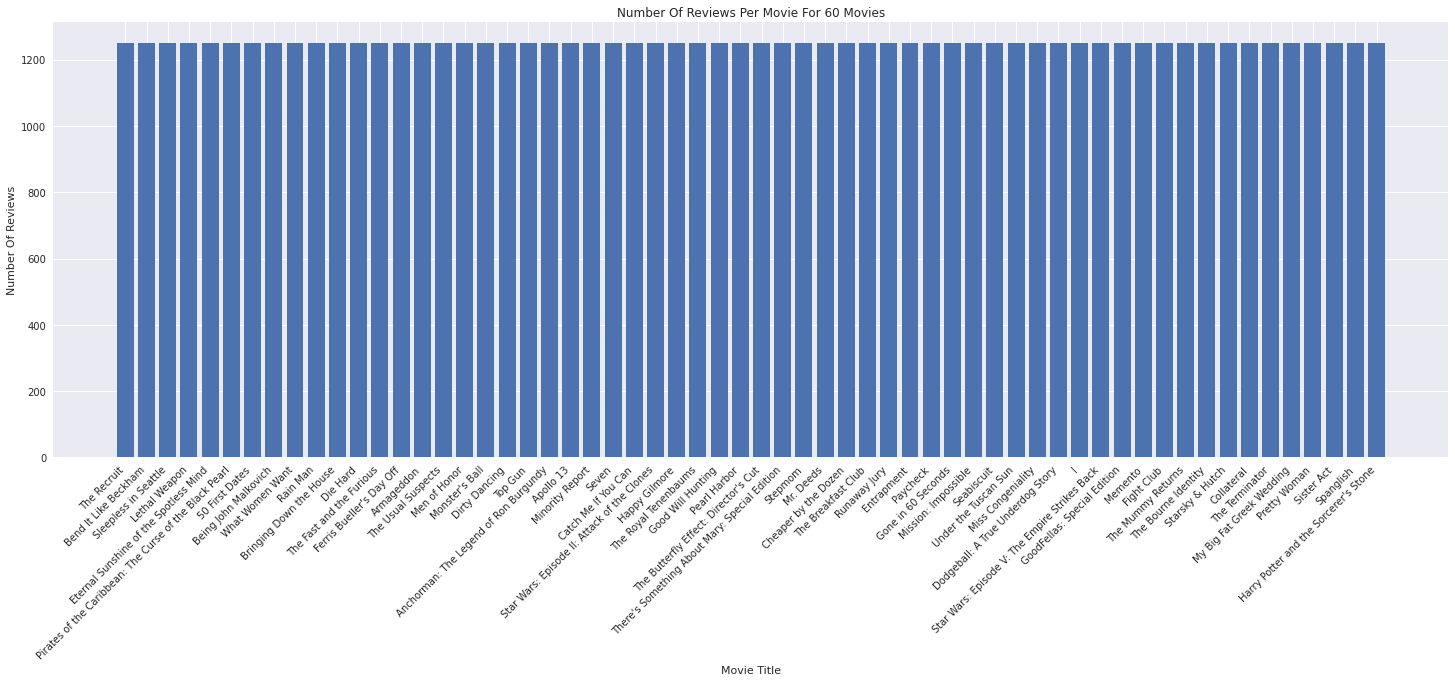

In [12]:
if len(least_reviews_per_movie)>=n_sample  : 
    x_values = range(n_sample)
    x_labels = least_reviews_per_movie['Title']
    y_values = least_reviews_per_movie['UserID'].values

    with plt.style.context('seaborn'):
        fig, ax = plt.subplots(figsize = (25,8))
        plt.bar(x_values, y_values)
        plt.xticks(x_values,x_labels, rotation=45, ha = 'right')
        plt.xlabel('movie title'.title())
        plt.ylabel('number of reviews'.title())
        plt.title(f'number of reviews per movie for {n_sample} movies'.title())
        plt.show()

# Number of reviews per user

In [13]:
reviews_per_user = mv_ss.groupby('UserID').count().sort_values('MovieID', ascending = True )[['MovieID']].rename(columns = {'MovieID': 'n_reviews'})

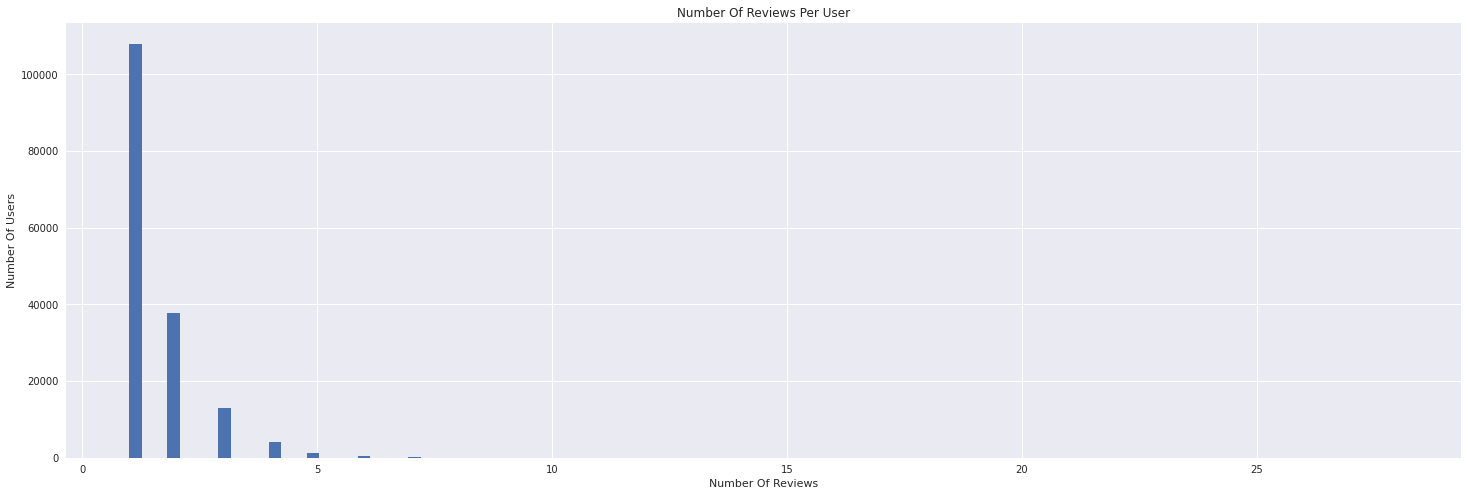

In [14]:
y_values = reviews_per_user['n_reviews']
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize = (25,8))
    plt.hist(y_values, bins = 100)
    plt.xlabel('number of reviews'.title())
    plt.ylabel('number of users'.title())
    plt.title(f'number of reviews per user'.title())
    plt.show()

# Statistics on ratings

In [15]:
mv_ss['Rating'].describe()

count    250000.000000
mean          3.000000
std           1.414216
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Rating, dtype: float64

In [16]:
rating_counts = mv_ss.groupby('Rating').count()[['MovieID']].rename(columns = {'MovieID': 'Count'})

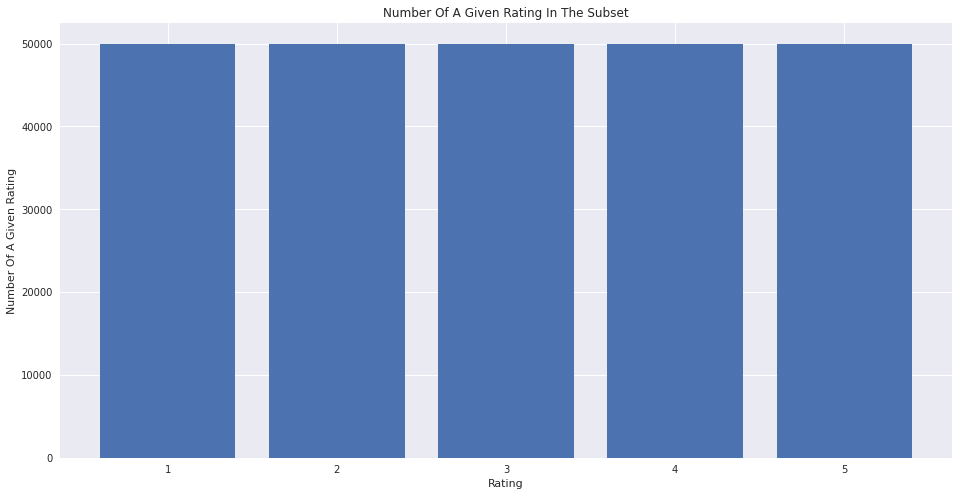

In [17]:
x_values = range(1, 6)
y_values = rating_counts['Count'].values
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize = (16,8))
    plt.bar(x_values, y_values)
    plt.xlabel('rating'.title())
    plt.ylabel('number of a given rating'.title())
    plt.title(f'number of a given rating in the subset'.title())
    plt.show()

In [18]:
mv_ss.groupby('UserID').count().describe()

,MovieID,Rating,RatingDate
count,164859.000000,164859.000000,164859.000000
mean,1.516447,1.516447,1.516447
std,0.878206,0.878206,0.878206
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,28.000000,28.000000,28.000000


# Statistics on Year of Release

In [19]:
mv_ss_full['YearOfRelease'].describe()

count    250000.000000
mean       1999.030000
std           5.893152
min        1972.000000
25%        1997.000000
50%        2001.000000
75%        2003.000000
max        2005.000000
Name: YearOfRelease, dtype: float64

In [20]:
release_year = mv_ss_full.groupby(['YearOfRelease', 'MovieID',]).count().reset_index()
release_year = release_year.groupby('YearOfRelease').count()[['MovieID']].rename(columns = {'MovieID' : 'n_movies'})
release_year

,n_movies
YearOfRelease,
1972,1
1978,1
1980,1
1981,1
1984,3
1985,1
1986,2
1987,2
1988,4


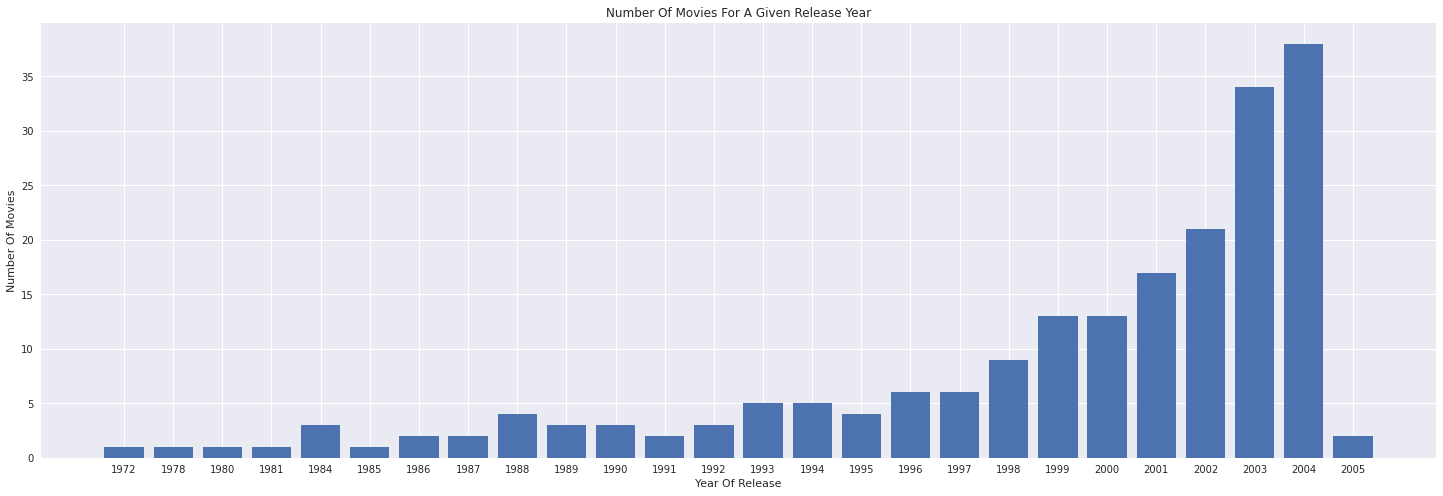

In [21]:
x_values = range(len(release_year))
x_labels = release_year.index
y_values = release_year['n_movies'].values

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize = (25,8))
    plt.bar(x_values, y_values)
    plt.xticks(x_values,x_labels)
    plt.xlabel('year of release'.title())
    plt.ylabel('number of movies'.title())
    plt.title(f'number of movies for a given release year'.title())
    plt.show()

# Statistics on year of ratings

In [22]:
mv_ss_full

,MovieID,UserID,Rating,RatingDate,YearOfRelease,Title
0,30,1366162,1,2005-10-26,2003,Something's Gotta Give
1,30,483101,1,2005-07-07,2003,Something's Gotta Give
2,30,2148796,1,2004-11-20,2003,Something's Gotta Give
3,30,998271,1,2004-06-21,2003,Something's Gotta Give
4,30,607621,1,2005-06-07,2003,Something's Gotta Give
...,...,...,...,...,...,...
249995,17627,2535210,5,2003-05-09,2001,Harry Potter and the Sorcerer's Stone
249996,17627,1649540,5,2005-11-20,2001,Harry Potter and the Sorcerer's Stone
249997,17627,1488234,5,2002-06-07,2001,Harry Potter and the Sorcerer's Stone
249998,17627,610780,5,2003-05-10,2001,Harry Potter and the Sorcerer's Stone


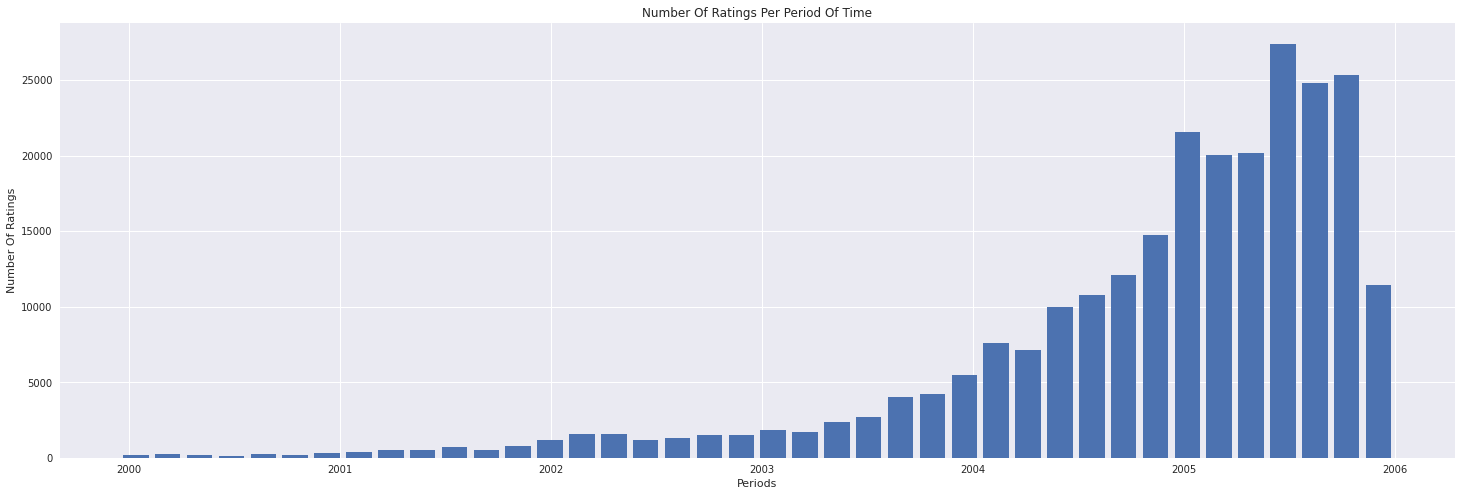

In [23]:

x_values = range(len(release_year))
x_labels = release_year.index
y_values = mv_ss_full['RatingDate'].values

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize = (25,8))
    plt.hist(y_values, bins = 40, rwidth=0.8)
    plt.xlabel('periods'.title())
    plt.ylabel('number of ratings'.title())
    plt.title(f'number of ratings per period of time'.title())
    plt.show()